# Homework Assignment: Data Aggregation with Pandas


## Introduction
In this assignment, you will apply data aggregation techniques using the Pandas library. You will perform groupings and apply window functions to a sales dataset.



## Objectives
- Practice using the `groupby` function for data aggregation.
- Understand and apply rolling window functions.
- Explore expanding window functions for cumulative statistics.


**Load Data**: `sales_region_hw.csv`

In [6]:
import pandas as pd

In [7]:
sales = pd.read_csv('/content/sales_region_hw.csv')

In [8]:
sales.head()

,Date,Region,Category,Sales,Quantity
0,2021-02-14,East,Furniture,715,33
1,2021-02-17,South,Electronics,59,15
2,2021-04-28,West,Furniture,955,62
3,2021-03-06,North,Furniture,353,88
4,2021-03-09,South,Electronics,579,33


### Task 1: Group By Region and Category
- Perform the following operations and answer the questions below:

In [9]:
# 1. Group the data by 'Region' and 'Category'. What is the total sales amount for each group?

grouped_by_reg_cat = sales.groupby(['Region', 'Category'])
grouped_by_reg_cat


In [10]:
sum = grouped_by_reg_cat.sum
sum()
#Total sales amount for each group.

<ipython-input-10-8292ec77650e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum()


Sales  Quantity
Region Category                    
East   Clothing     18883      1708
       Electronics  15060      1650
       Furniture    12108      1286
       Groceries    17706      2074
North  Clothing     14481      1982
       Electronics  15253      1543
       Furniture    18653      1879
       Groceries    13188      1290
South  Clothing     14143      1531
       Electronics  19557      1798
       Furniture    16604      1853
       Groceries     9946      1298
West   Clothing     10033      1095
       Electronics  19070      1538
       Furniture    13069      1202
       Groceries    17713      1749

In [11]:
# 2. Which 'Region' and 'Category' combination has the highest average quantity sold?
avg_quantity = grouped_by_reg_cat['Quantity'].mean
avg_quantity()
#Highest AVERAGE based on category and region: North, Electronics. (57.15)


Region  Category   
East    Clothing       46.162162
        Electronics    55.000000
        Furniture      53.583333
        Groceries      49.380952
North   Clothing       63.935484
        Electronics    57.148148
        Furniture      49.447368
        Groceries      44.482759
South   Clothing       52.793103
        Electronics    46.102564
        Furniture      56.151515
        Groceries      46.357143
West    Clothing       52.142857
        Electronics    45.235294
        Furniture      50.083333
        Groceries      51.441176
Name: Quantity, dtype: float64

In [12]:
# 3. How many unique 'Category' entries are there for each 'Region'?

unique_cat = grouped_by_reg_cat['Region'].unique()
unique_cat.count()
16
#16 unique entries for each region.

16

In [13]:
# 4. For each 'Region', what is the maximum sales value for 'Clothing'?
max_sales_clothing = grouped_by_reg_cat['Sales'].max
max_sales_clothing()
#MAX sales for clothing
#EAST: 970
#NORTH: 994
#SOUTH: 995
#WEST:: 961

Region  Category   
East    Clothing       970
        Electronics    993
        Furniture      987
        Groceries      942
North   Clothing       994
        Electronics    980
        Furniture      957
        Groceries      921
South   Clothing       995
        Electronics    953
        Furniture      966
        Groceries      862
West    Clothing       961
        Electronics    978
        Furniture      970
        Groceries      975
Name: Sales, dtype: int64

In [14]:
# 5. Calculate the total 'Quantity' for each 'Category' across all 'Regions'. Which 'Category' has the highest total quantity?
QuantityTotal = grouped_by_reg_cat['Quantity'].sum
QuantityTotal()

#Highest Quantity Category = East, Groceries, 2074 units.


Region  Category   
East    Clothing       1708
        Electronics    1650
        Furniture      1286
        Groceries      2074
North   Clothing       1982
        Electronics    1543
        Furniture      1879
        Groceries      1290
South   Clothing       1531
        Electronics    1798
        Furniture      1853
        Groceries      1298
West    Clothing       1095
        Electronics    1538
        Furniture      1202
        Groceries      1749
Name: Quantity, dtype: int64

### Task 2: Rolling Window Function
- Perform the following operations and answer the questions below:

In [15]:
# Perform the following operations and answer the questions below:
# 1. Calculate a 7-day rolling average of 'Sales'. On which date does the East region reach its highest 7-day rolling average of sales?
sales['7_day_rolling_avg']=sales.groupby('Region')['Sales'].rolling(window=7,min_periods=1).mean().reset_index(level=0, drop=True)



In [16]:
sales.head(10)

,Date,Region,Category,Sales,Quantity,7_day_rolling_avg
0,2021-02-14,East,Furniture,715,33,715.000000
1,2021-02-17,South,Electronics,59,15,59.000000
2,2021-04-28,West,Furniture,955,62,955.000000
3,2021-03-06,North,Furniture,353,88,353.000000
4,2021-03-09,South,Electronics,579,33,319.000000
5,2021-03-09,East,Furniture,730,57,722.500000
6,2021-04-14,North,Furniture,51,29,202.000000
7,2021-01-10,North,Furniture,484,44,296.000000
8,2021-03-25,North,Groceries,762,98,412.500000
9,2021-01-22,East,Furniture,204,51,549.666667


In [17]:
# 2. What is the overall average of the 7-day rolling sales amounts for each region?
sales[sales['Region'] == 'East'].head()
#East rolling sales


,Date,Region,Category,Sales,Quantity,7_day_rolling_avg
0,2021-02-14,East,Furniture,715,33,715.000000
5,2021-03-09,East,Furniture,730,57,722.500000
9,2021-01-22,East,Furniture,204,51,549.666667
18,2021-03-07,East,Electronics,89,94,434.500000
19,2021-04-13,East,Groceries,84,23,364.400000


In [18]:
sales[sales['Region'] == 'West'].head()

,Date,Region,Category,Sales,Quantity,7_day_rolling_avg
2,2021-04-28,West,Furniture,955,62,955.000000
11,2021-02-06,West,Furniture,283,73,619.000000
17,2021-02-28,West,Electronics,672,86,636.666667
25,2021-02-07,West,Electronics,383,5,573.250000
26,2021-01-26,West,Groceries,170,90,492.600000


In [19]:
sales[sales['Region'] == 'North'].head()

,Date,Region,Category,Sales,Quantity,7_day_rolling_avg
3,2021-03-06,North,Furniture,353,88,353.0
6,2021-04-14,North,Furniture,51,29,202.0
7,2021-01-10,North,Furniture,484,44,296.0
8,2021-03-25,North,Groceries,762,98,412.5
12,2021-03-29,North,Furniture,30,38,336.0


In [20]:
sales[sales['Region'] == 'South'].head()

,Date,Region,Category,Sales,Quantity,7_day_rolling_avg
1,2021-02-17,South,Electronics,59,15,59.000000
4,2021-03-09,South,Electronics,579,33,319.000000
10,2021-04-25,South,Electronics,953,47,530.333333
16,2021-01-13,South,Clothing,246,68,459.250000
20,2021-02-09,South,Clothing,172,83,401.800000


In [21]:
# 3. Plot the 7-day rolling average of sales for any one region. What general trends do you observe?
sales[sales['Region'] == 'East'].head(12)

#Furniture has the highest rolling 7 day average in the 700+s. with one nearing 580+
#Groceries in the range of 360-430 of rolling 7 day average
#Clothing had a range of 450-553
#Electronics Only showed up once (434.50)
#Less Electronics showing up overall in comparison to other categories. (at least with sample of 12)

,Date,Region,Category,Sales,Quantity,7_day_rolling_avg
0,2021-02-14,East,Furniture,715,33,715.000000
5,2021-03-09,East,Furniture,730,57,722.500000
9,2021-01-22,East,Furniture,204,51,549.666667
18,2021-03-07,East,Electronics,89,94,434.500000
19,2021-04-13,East,Groceries,84,23,364.400000
33,2021-04-26,East,Clothing,881,92,450.500000
34,2021-03-11,East,Furniture,933,37,519.428571
39,2021-04-10,East,Clothing,334,52,465.000000
49,2021-03-07,East,Groceries,213,46,391.142857
50,2021-01-10,East,Groceries,460,81,427.714286


In [22]:
# 4. Compare the 7-day rolling average of sales with the actual sales. How do the trends differ?


In [23]:
sales[sales['Region'] == 'East'].head(12)


,Date,Region,Category,Sales,Quantity,7_day_rolling_avg
0,2021-02-14,East,Furniture,715,33,715.000000
5,2021-03-09,East,Furniture,730,57,722.500000
9,2021-01-22,East,Furniture,204,51,549.666667
18,2021-03-07,East,Electronics,89,94,434.500000
19,2021-04-13,East,Groceries,84,23,364.400000
33,2021-04-26,East,Clothing,881,92,450.500000
34,2021-03-11,East,Furniture,933,37,519.428571
39,2021-04-10,East,Clothing,334,52,465.000000
49,2021-03-07,East,Groceries,213,46,391.142857
50,2021-01-10,East,Groceries,460,81,427.714286


COMPARISONS:

In [ ]:

#Furniture: ONE order Act. sales HIGHER than average rolling (#5: 730 ACTUAL vs. 722.50 ROLLING)
#Furniture: ONE order Act. sales LOWER than average rolling (#61: 253 ACTUAL vs. 577 ROLLING)
#Furniture: ONE order Actual sales SAME as rolling avg (#0: 715 vs 715)
#FURNITURE OVERALLL: Overall Actual sales and rolling average pretty similar based on comparisons.

#Electronics: Overall LOWER Sales compared to rolling average.
# Only 1 showed up: (#18. 89 ACTUAL vs. 434.50 ROLLING )

#Groceries:Two order have lower actual sales compared to rolling average
 #(#19: 84 ACTUAL vs. 364.40 ROLLING )
 #(#49: 213 ACTUAL vs. 391.14 ROLLING)

 #ONE order has HIGHER sales compared to rolling average (#50: 460 ACTUAL vs. 427 ROLLING)

 #GROCERIES OVERALL: LOWER ACTUAL SALES COMPARED TO ROLLING AVERAGE.


#Clothing: TWO order HIGHER in sales ACTUAL compared to rolling average. (#58: 970 ACTUAL vs. 553 ROLLING / #33: 881 ACTUAL vs. 450 ROLLING)
#ONE order SALES LOWER compared to rolling average (#39: 334 ACTUAL vs. 465.00 ROLLING)

#CLOTHING OVERALL: HIGHER IN ACTUAL SALES COMPARED TO ROLLING AVERAGE

### Task 3: Expanding Window Function
- Perform the following operations and answer the questions below:

In [26]:
# 1. Calculate the cumulative sum of 'Sales' for each region. Which region hits the sales amount of $10,000 first?
sales['cum_sales'] = sales.groupby('Region')['Sales'].expanding(min_periods=1).sum().reset_index(level=0,drop=True)

#Based on the first 5 orders, West has the most cumulative sales
#So West hits the sales amount of $10k first.

In [46]:
sales[sales['Region']== 'East'].head()
#715 + 1445 + 1649 + 1738 + 1822 = 7369

,Date,Region,Category,Sales,Quantity,7_day_rolling_avg,cum_sales
0,2021-02-14,East,Furniture,715,33,715.000000,715.0
5,2021-03-09,East,Furniture,730,57,722.500000,1445.0
9,2021-01-22,East,Furniture,204,51,549.666667,1649.0
18,2021-03-07,East,Electronics,89,94,434.500000,1738.0
19,2021-04-13,East,Groceries,84,23,364.400000,1822.0


In [39]:
cum_sales = sales[sales['Region']== 'West'].head()
cum_sales
#Total Cumulative Sales = 955 + 1238 + 1910 + 2293 + 2463 = 8856

,Date,Region,Category,Sales,Quantity,7_day_rolling_avg,cum_sales
2,2021-04-28,West,Furniture,955,62,955.000000,955.0
11,2021-02-06,West,Furniture,283,73,619.000000,1238.0
17,2021-02-28,West,Electronics,672,86,636.666667,1910.0
25,2021-02-07,West,Electronics,383,5,573.250000,2293.0
26,2021-01-26,West,Groceries,170,90,492.600000,2463.0


In [31]:
sales[sales['Region']== 'North'].head()
#Total Cum Sales = 353 + 404 + 888 + 1650 + 1680 =
#4975 total

,Date,Region,Category,Sales,Quantity,7_day_rolling_avg,cum_sales
3,2021-03-06,North,Furniture,353,88,353.0,353.0
6,2021-04-14,North,Furniture,51,29,202.0,404.0
7,2021-01-10,North,Furniture,484,44,296.0,888.0
8,2021-03-25,North,Groceries,762,98,412.5,1650.0
12,2021-03-29,North,Furniture,30,38,336.0,1680.0


In [36]:
sales[sales['Region']== 'South'].head()
#Total Cum Sales = 59 + 638 + 1591 + 1837 + 2009
# 6134 Total

,Date,Region,Category,Sales,Quantity,7_day_rolling_avg,cum_sales
1,2021-02-17,South,Electronics,59,15,59.000000,59.0
4,2021-03-09,South,Electronics,579,33,319.000000,638.0
10,2021-04-25,South,Electronics,953,47,530.333333,1591.0
16,2021-01-13,South,Clothing,246,68,459.250000,1837.0
20,2021-02-09,South,Clothing,172,83,401.800000,2009.0


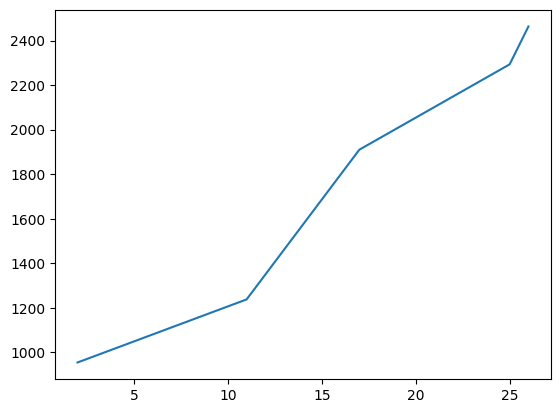

In [40]:
# 2. For the region with the highest cumulative sales, plot the cumulative sales over time. What observations can you make about the growth of sales?

#West region has highest sale. Plot of cumulative sales:
import matplotlib.pyplot as plt
plt.plot(cum_sales['cum_sales'])


#As orders go on (x-axis), cumulative sales increase.

In [ ]:
# 3. At what point in time does the cumulative sales double for any region?
#The amount of sales doubles at around the 11th order.

In [43]:
!jupyter nbconvert --to html '/content/Jennifer_Lee_Copy_of_pandas_data_aggregation_homework.ipynb'

[NbConvertApp] Converting notebook /content/Jennifer_Lee_Copy_of_pandas_data_aggregation_homework.ipynb to html
[NbConvertApp] Writing 747413 bytes to /content/Jennifer_Lee_Copy_of_pandas_data_aggregation_homework.html
